<a href="https://www.kaggle.com/code/rinichristy/k-nearest-neighbors-to-predict-breast-cancer?scriptVersionId=92595576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-Nearest Neighbors to predict the presence of breast cancer**

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. This algorithm classifies cases based on their similarity to other cases. In K-Nearest Neighbors, data points that are near each other are said to be neighbors. K-Nearest Neighbors is based on this paradigm. Similar cases with the same class labels are near each other. Thus, the distance between two cases is a measure of their dissimilarity. There are different ways to calculate the similarity or conversely, the distance or dissimilarity of two data points. For example, this can be done using Euclidean distance. 

In a classification problem, the K-Nearest Neighbors algorithm works as follows. 

1.   Pick a value for K
2.   Calculate the distance of unknown new case from each of the cases in the dataset. 
3.   Search for the K-observations in the training data that are nearest to the measurements of the unknown data point.
2.   Predict the response of the unknown data point using the most popular response value from the K-Nearest Neighbors. 

## **Table of Contents**
* [Dataset Information](#Dataset)
* [Data Exploration (EDA)](#EDA)
* [Model Development](#KNN)
* [Model Evaluation](#KNNEvaluation)
* [Choosing a K Value](#KValue)

**Importing the required library packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Dataset Information**<a name="Dataset"></a>
The [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) is obtained from UCI Machine Learning Repository. More information is gathered from the original [research paper](https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1) published in 2018.

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.

Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

**Attribute Information:**

**Quantitative Attributes:**
*   Age (years)
*   BMI (kg/m2)
*   Glucose (mg/dL)
*   Insulin (µU/mL)
*   Homeostasis Model Assessment (HOMA) index to evaluate insulin resistance
*   Leptin (ng/mL)
*   Adiponectin (µg/mL)
*   Resistin (ng/mL)
*   Monocyte chemoattractant protein-1 (MCP-1(pg/dL)) 

**Labels:**

1=Healthy controls

2=Patients


**Load the dataset**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## **Data Exploration**<a name="EDA"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [5]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

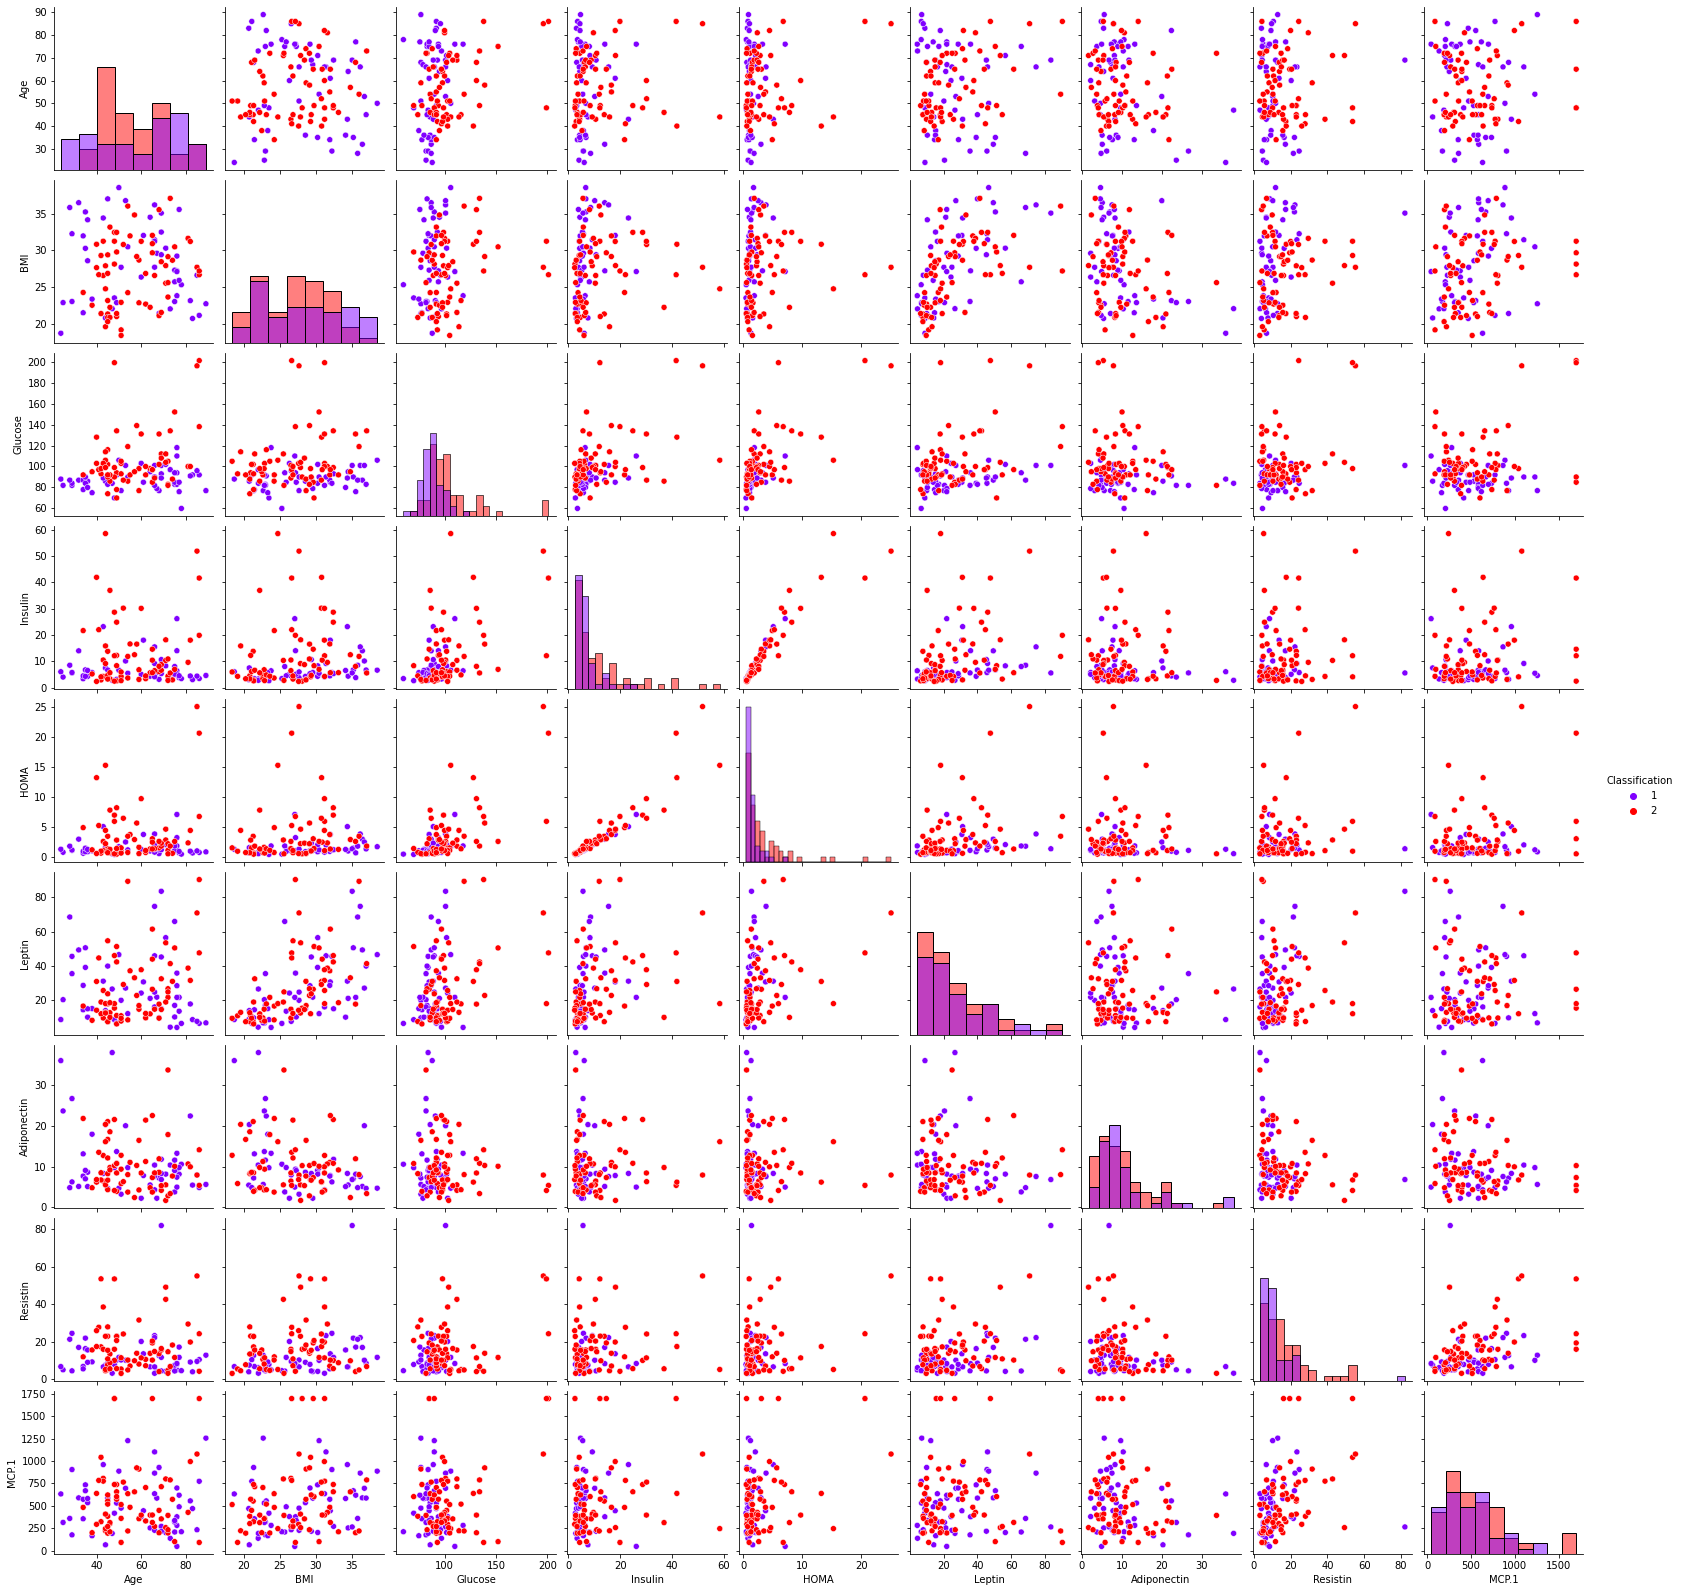

In [6]:
sns.pairplot(df, hue = 'Classification', palette = 'rainbow', diag_kind = "hist");

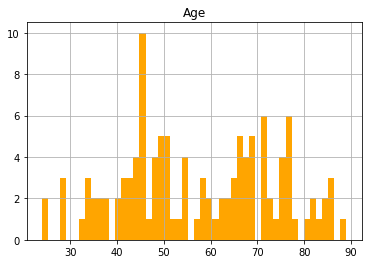

In [7]:
df.hist(column='Age', bins = 50,color = 'orange');

### **Data Preprocessing**

In [8]:
X = df.drop('Classification',axis=1)
X.head(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786


In [9]:
y = df['Classification']
y.head(2)

0    1
1    1
Name: Classification, dtype: int64

To use scikit-learn library, it is recommeneded to convert the Pandas data frame to a Numpy array. Supplying an array of floats is a safe bet, but it's not a must. Whatever is supplied will be attempted to convert to numpy array internally. If it's not an array-like (see below) an exception will be raised. 

**array-like**

The most common data format for input to Scikit-learn estimators and functions, array-like is any type object for which numpy.asarray will produce an array of appropriate shape (usually 1 or 2-dimensional) of appropriate dtype (usually numeric).

This includes:

a numpy array

a list of numbers

a list of length-k lists of numbers for some fixed length k

a pandas.DataFrame with all columns numeric

a numeric pandas.Series

In [10]:
#X = X.values
#y = y.values
X[0:2]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786


In [11]:
y[0:2]

0    1
1    1
Name: Classification, dtype: int64

### **Normalize Data**
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

To calculate the similarity between two data points a specific type of Minkowski distance can be used.it is indeed the Euclidean distance. For this, the dataset feastures need to be normalizes to get the accurate dissimilarity measure. 

In [12]:
#Import StandardScaler from Scikit learn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.57979363, -0.81667527, -1.23922225, -0.72873938, -0.61428241,
        -0.93233407, -0.07022151, -0.54551749, -0.34125061],
       [ 1.60182096, -1.37875056, -0.25829943, -0.68803819, -0.54824045,
        -0.93041264, -0.69734988, -0.86421418, -0.1912238 ],
       [ 1.53948912, -0.89176446, -0.30288683, -0.55007314, -0.46475236,
        -0.45421914,  1.79799836, -0.4416602 ,  0.05821407],
       [ 0.66684328, -1.24330321, -0.92711044, -0.67696507, -0.57420965,
        -0.87602119, -0.44194467, -0.15886735,  1.14271758],
       [ 1.7888165 , -1.29460116, -0.25829943, -0.6447433 , -0.52108087,
        -1.04268238, -0.78688094, -0.33635201,  0.69471601]])

### **Train Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that the outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


Use train_test_split to split the data into a training set and a testing set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (92, 9) (92,)
Test set: (24, 9) (24,)


## **Model Development: K nearest neighbor (KNN) Classification** <a name="KNN"></a>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#start the algorithm with k=4 for now:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

**Predicting the test set**

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1])

## **Model Evaluation - KNN Classification**<a name="KNNEvaluation"></a>

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("for K=4")
print("Train set Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
print('Accuracy of KNN Classification Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of KNN Classification Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for KNN Classification Model:' '\n',classification_report(y_test, y_pred))

for K=4
Train set Accuracy:  0.75
Accuracy of KNN Classification Model is  0.7083333333333334

 
 Confusion Matrix of KNN Classification Model:
 [[ 7  2]
 [ 5 10]]

 
 Classification Report for KNN Classification Model:
               precision    recall  f1-score   support

           1       0.58      0.78      0.67         9
           2       0.83      0.67      0.74        15

    accuracy                           0.71        24
   macro avg       0.71      0.72      0.70        24
weighted avg       0.74      0.71      0.71        24



## **Choosing a K Value**<a name="KValue"></a>

A very low value of K would capture the noise in the data or one of the points that was an anomaly or outlier in the data. It also causes a highly complex model as well, which might result in overfitting of the model. It means the prediction process is not generalized enough to be used for out-of-sample cases. Out-of-sample data is data that is outside of the data set used to train the model. In other words, it cannot be trusted to be used for prediction of unknown samples. It's important to remember that overfitting is bad, as we want a general model that works for any data, not just the data used for training.

Now, on the opposite side of the spectrum, if a very high value of K such as K equals 20 is chosen, then the model becomes overly generalized.

Use the elbow method to pick a good K Value. 

Two methods are used here: One using error rate and the second one with the accuracy.

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

Text(0.5, 0, 'K Value')

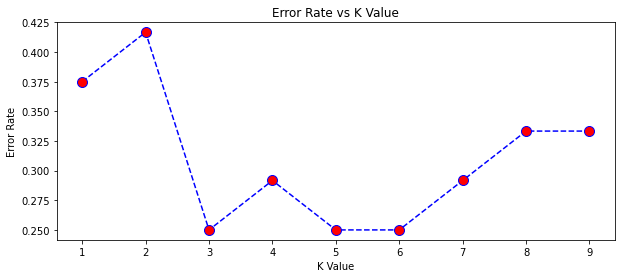

In [17]:
error_rate = []
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

plt.figure(figsize = (10,4))
plt.plot(range(1,10), error_rate, color = "blue", ls = "--", marker ="o", markersize = 10, markerfacecolor ="red")
plt.title("Error Rate vs K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value")

In [18]:
print( "The least error_rate was with", min(error_rate), "with k=", np.argmin(error_rate)+1) 

The least error_rate was with 0.25 with k= 3


In [19]:
from sklearn import metrics
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
mean_acc

array([0.625     , 0.58333333, 0.75      , 0.70833333, 0.75      ,
       0.75      , 0.70833333, 0.66666667, 0.66666667])

**Plot model accuracy for Different number of Neighbors**

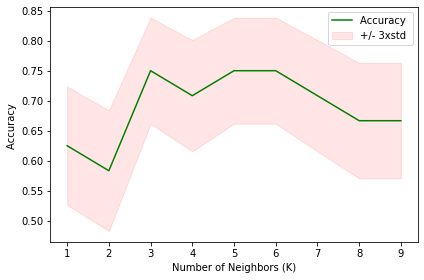

In [20]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color = 'r')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.75 with k= 3


**Substituting the algorithm with k=3:**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("for K=3")
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
print('Accuracy of KNN Classification Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of KNN Classification Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for KNN Classification Model:' '\n',classification_report(y_test, y_pred))

for K=3
Train set Accuracy:  0.8260869565217391
Accuracy of KNN Classification Model is  0.75

 
 Confusion Matrix of KNN Classification Model:
 [[ 7  2]
 [ 4 11]]

 
 Classification Report for KNN Classification Model:
               precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.85      0.73      0.79        15

    accuracy                           0.75        24
   macro avg       0.74      0.76      0.74        24
weighted avg       0.77      0.75      0.75        24

